In [ ]:
References/Credit : https://www.kaggle.com/singhsatwinder/dog-vs-cat-classification-using-tf-with-keras

In [5]:


import numpy as np 
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense  , Activation
from keras import applications
import re
from os import listdir

In [6]:
train_path = '/content/drive/My Drive/CNN/train/train/'
test_path = '/content/drive/My Drive/ImageProcessingDataSet/test/'





Text(0.5, 1.0, 'Dog')

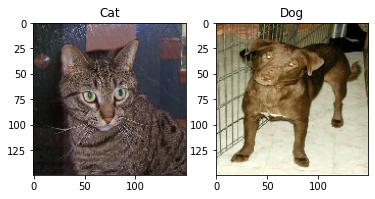

In [7]:
import matplotlib.pyplot as plt
fig,axes=plt.subplots(nrows=1,ncols=2)

img1=load_img(train_path+'cat.1.jpg',target_size=(150,150))
axes[0].imshow(img1)
axes[0].set_title("Cat")
img2=load_img(train_path+'dog.1.jpg',target_size=(150,150))
axes[1].imshow(img2)
axes[1].set_title("Dog")

In [9]:
# Setting the parameters 
img_width = 150
img_height = 150
TRAIN_DIR = train_path
TEST_DIR =  test_path
train_images_dogs_cats = [TRAIN_DIR+i for i in listdir(TRAIN_DIR)] # use this for full dataset
test_images_dogs_cats = [TEST_DIR+i for i in listdir(TEST_DIR)] 

In [10]:
# images in directory path
train_images_dogs_cats[:5]

['/content/drive/My Drive/CNN/train/train/cat.9558.jpg',
 '/content/drive/My Drive/CNN/train/train/cat.9583.jpg',
 '/content/drive/My Drive/CNN/train/train/cat.9571.jpg',
 '/content/drive/My Drive/CNN/train/train/cat.9567.jpg',
 '/content/drive/My Drive/CNN/train/train/cat.9541.jpg']

In [11]:
def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    return [ atoi(c) for c in re.split('(\d+)', text) ]

In [12]:
#Natural sorting on training data
train_images_dogs_cats.sort(key=natural_keys)

In [13]:
train_images_dogs_cats[:5]

['/content/drive/My Drive/CNN/train/train/cat.0.jpg',
 '/content/drive/My Drive/CNN/train/train/cat.1.jpg',
 '/content/drive/My Drive/CNN/train/train/cat.2.jpg',
 '/content/drive/My Drive/CNN/train/train/cat.3.jpg',
 '/content/drive/My Drive/CNN/train/train/cat.4.jpg']

In [14]:
#Choose a subset

train_images_dogs_cats = train_images_dogs_cats[0:3000] + train_images_dogs_cats[12500:15500] 

# natural sorting the test images
test_images_dogs_cats.sort(key=natural_keys)

In [21]:
def prepare_data(list_of_images):
    """
    Returns a array of images
    
    """
    x = [] # images as arrays
    a = 0
    for image in list_of_images:
        a = a + 1
        x.append(img_to_array(load_img(image,target_size=(img_width,img_height))))
        if a%100 == 0:
          print(a)
    return x

In [ ]:
X=prepare_data(train_images_dogs_cats)
X=np.array(X)
y=np.array([0]*3000 + [1]*3000)

In [17]:
len(train_images_dogs_cats)

6000

In [23]:
# Spliting the data in training and validation data
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1) 

In [24]:
# Shape of training data
print('Shape of training data {}'.format(X_train.shape))

Shape of training data (4800, 150, 150, 3)


In [25]:
nb_train=len(X_train)
nb_validation=len(X_val)
batch_size=16

In [26]:
datagen = ImageDataGenerator(rescale=1. / 255)
weight_p = '/content/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
weights_path = 'C:/Users/ldesira/Downloads/dogs-vs-cats-redux-kernels-edition (1)/'
# build the VGG16 network
model_vgg16 = applications.VGG16(include_top=False, weights = weight_p)
    
# creating a train generator 
generator = datagen.flow(X_train,y_train, batch_size=batch_size,shuffle=False)
    
# getting training data bottle neck features from  VGG16 model
bottleneck_features_train = model_vgg16.predict_generator(generator, nb_train // batch_size ,verbose=1 ) 

Instructions for updating:
Please use Model.predict, which supports generators.
300/300 [==============================] - 6s 19ms/step


In [27]:
# validation generator
generator = datagen.flow(X_val,y_val,batch_size=batch_size,shuffle=False)
    
# getting validation data bottle neck features from VGG16 model
bottleneck_features_validation = model_vgg16.predict_generator(
        generator, nb_validation // batch_size , verbose =1 ) 

75/75 [==============================] - 1s 19ms/step


In [28]:
# shape of bottleneck features
print("Shape of training bottleneck feature {}".format(bottleneck_features_train.shape))

Shape of training bottleneck feature (4800, 4, 4, 512)


In [29]:
model = Sequential()
#input layer
model.add(Flatten(input_shape=bottleneck_features_train.shape[1:]))

# first hidden layer
model.add(Dense(units=256,activation='relu'))
model.add(Dropout(0.4))

# Second hidden layer
model.add(Dense(units=126,activation='relu'))
model.add(Dropout(0.4))

#output layer
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy', metrics=['accuracy'])

#fitting the model
history=model.fit(x=bottleneck_features_train,y=y_train,
                  epochs=10,
                  batch_size=batch_size,
                  validation_data=(bottleneck_features_validation,y_val))

model.save('TL_model.h5')

Epoch 1/10
300/300 [==============================] - 1s 4ms/step - loss: 0.4988 - accuracy: 0.7927 - val_loss: 0.2688 - val_accuracy: 0.8875
Epoch 2/10
300/300 [==============================] - 1s 3ms/step - loss: 0.3281 - accuracy: 0.8656 - val_loss: 0.2591 - val_accuracy: 0.8958
Epoch 3/10
300/300 [==============================] - 1s 4ms/step - loss: 0.2879 - accuracy: 0.8883 - val_loss: 0.2781 - val_accuracy: 0.8867
Epoch 4/10
300/300 [==============================] - 1s 4ms/step - loss: 0.2503 - accuracy: 0.9058 - val_loss: 0.2450 - val_accuracy: 0.9050
Epoch 5/10
300/300 [==============================] - 1s 4ms/step - loss: 0.2337 - accuracy: 0.9092 - val_loss: 0.2704 - val_accuracy: 0.9017
Epoch 6/10
300/300 [==============================] - 1s 4ms/step - loss: 0.2143 - accuracy: 0.9146 - val_loss: 0.2946 - val_accuracy: 0.8975
Epoch 7/10
300/300 [==============================] - 1s 4ms/step - loss: 0.1908 - accuracy: 0.9248 - val_loss: 0.2613 - val_accuracy: 0.9125
Epoch 

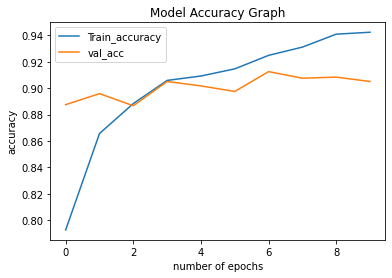

In [31]:
# visualizing the model
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['accuracy'],label='Train_accuracy')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.xlabel('number of epochs')
plt.ylabel('accuracy')
plt.title('Model Accuracy Graph')
plt.legend()
plt.show()

In [ ]:
# predicting result of test data
X_test = prepare_data(test_images_dogs_cats)
X_test=np.array(X_test)
print('Shape of test data {}'.format(X_test.shape))

In [36]:
nb_test=len(X_test)
batch_size=20

In [37]:
# test data generator
test_datagen = ImageDataGenerator(rescale=1. / 255)
test_generator = test_datagen.flow( X_test, batch_size=batch_size,shuffle=False)

model_vgg16 = applications.VGG16(include_top=False, weights=weight_p)

#bottle neck features of our test data
bottleneck_feature_test_data=model_vgg16.predict_generator(test_generator,nb_test//batch_size,verbose=1)

# predicting probablities
prediction_probabilities = model.predict(bottleneck_feature_test_data,verbose=1) 

391/391 [==============================] - 1s 1ms/step


I am 100.00% sure I am Dog


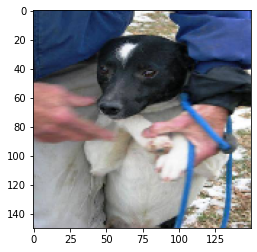

I am 100.00% sure I am Dog


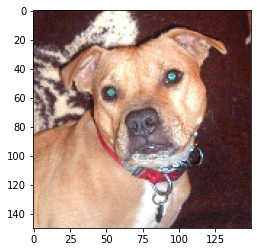

I am 100.00% sure I am Dog


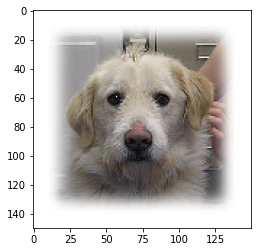

I am 100.00% sure I am Dog


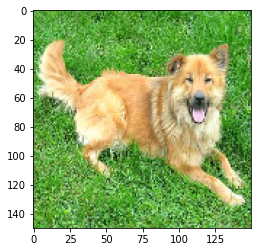

I am 99.33% sure I am Cat


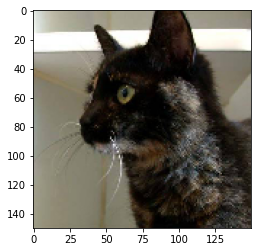

I am 96.96% sure I am Cat


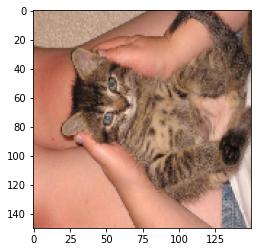

I am 100.00% sure I am Cat


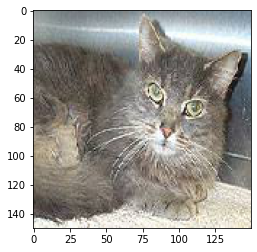

I am 97.55% sure I am Cat


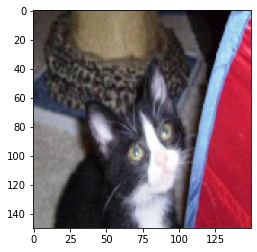

I am 100.00% sure I am Cat


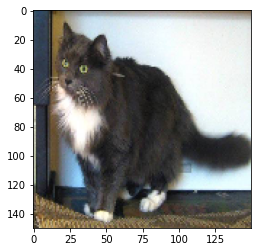

I am 99.75% sure I am Cat


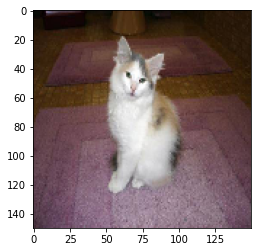

In [38]:
for i in range(10):
    if prediction_probabilities[i][0] > 0.5:
        print("I am {a:.2%} sure I am Dog".format(a=prediction_probabilities[i][0]))
    else:
        print("I am {a:.2%} sure I am Cat".format(a=(1-prediction_probabilities[i][0])))
    plt.imshow(load_img(test_images_dogs_cats[i],target_size=(150,150)))
    plt.show()

In [39]:
# creating a submission file
counter = range(1, len(test_images_dogs_cats) +1 )
solution = pd.DataFrame({"id": counter, "label":list(prediction_probabilities)})
cols = ['label']

for col in cols:
    solution[col] = solution[col].map(lambda x: str(x).lstrip('[').rstrip(']')).astype(float)

solution.to_csv("dogsVScats.csv", index = False)